<a href="https://colab.research.google.com/github/daisy2821/customer_Churn_Prediction.github.io/blob/master/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Loading the data in pandas
df = pd.read_csv('hd.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
print('Percentage of churned customers: ', round(((1869 / (5174+1869)) *100),2))

Percentage of churned customers:  26.54


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Converting datatypes as TotalCharges is not float 
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
round(df[['tenure','MonthlyCharges','TotalCharges']].describe(),1)

,tenure,MonthlyCharges,TotalCharges
count,7032.0,7032.0,7032.0
mean,32.4,64.8,2283.3
std,24.5,30.1,2266.8
min,1.0,18.2,18.8
25%,9.0,35.6,401.4
50%,29.0,70.4,1397.5
75%,55.0,89.9,3794.7
max,72.0,118.8,8684.8


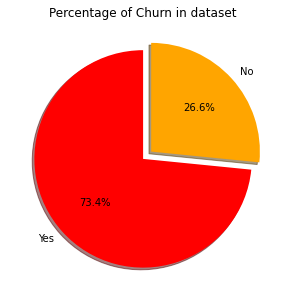

In [14]:
data_size = df.Churn.value_counts(sort=True)
colors = ['red','orange']
rcParams['figure.figsize'] = 5,5

# For plotting
labels = 'Yes', 'No'
explode = (0, 0.1) 
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of Churn in dataset')
plt.show()

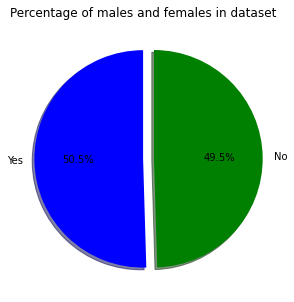

In [16]:
data_size = df.gender.value_counts(sort=True)
colors = ['blue','green']
rcParams['figure.figsize'] = 5,5

# For plotting
labels = 'Yes', 'No'
explode = (0, 0.1) 
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of males and females in dataset')
plt.show()

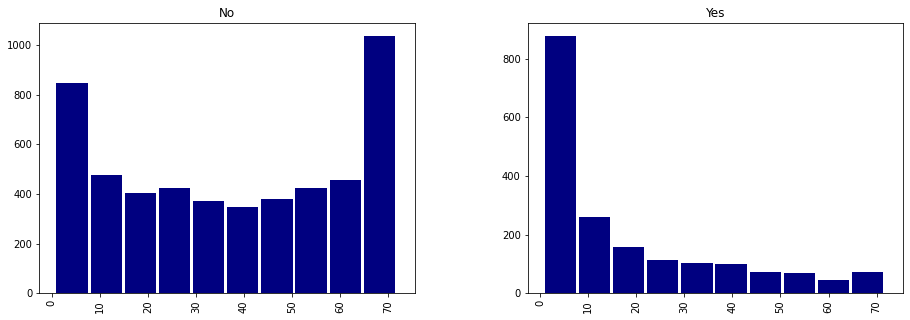

In [17]:
tenure_churn =df['tenure'].hist(by=df['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()


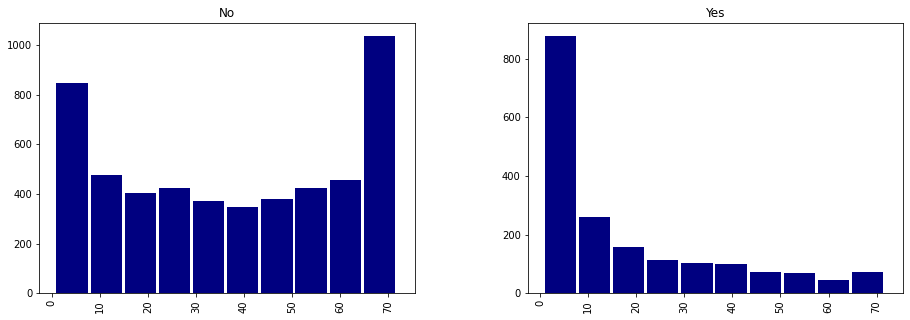

In [18]:
tenure_churn =df['tenure'].hist(by=df['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()


In [20]:
df.drop('customerID', axis=1, inplace=True)


In [21]:
df.isnull().values.any()

False

In [22]:
df = df.apply(LabelEncoder().fit_transform)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


In [23]:
df.corr(method="pearson")


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013929,-0.000579,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219210,0.107202,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.107482,0.342319,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.105948,0.081626,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.267182,0.871680,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.271652,0.085934,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.445006,0.463532,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.243738,-0.209762,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.044322,0.246996,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.141519,0.352453,-0.195290


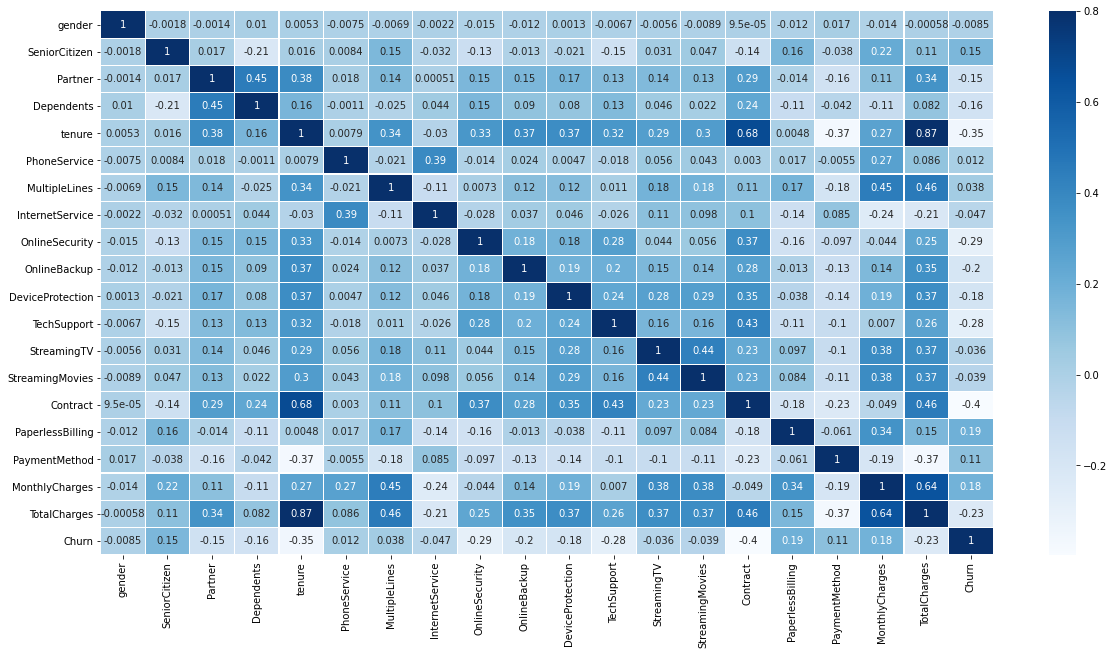

In [24]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
sns.heatmap(corr_matrix, linewidths=0.1, cmap = plt.cm.Blues, linecolor = 'White', vmax=0.8, annot=True)

In [25]:
# testing datasets for building the classifier. We will then normalize the data
X = df.iloc[:,:-2]   # -2 because we don't want to include the TotalCharges column too
y = df[['Churn']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

# Normalizing/Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)


We have 18 features now and we are going to use few methods to remove the redundant features from our dataset:

Feature Importance using Random forest
Recursive feature elimination using Logistic Regression

In [28]:
rf = RandomForestClassifier(n_estimators =100, random_state=0)
rf.fit(X_train_sc, y_train)
importances = rf.feature_importances_

In [29]:
f_imp = pd.Series(importances, df.columns[:-2])
f_imp.sort_values(ascending=False, inplace=True)
f_imp


MonthlyCharges      0.236170
tenure              0.225500
Contract            0.086354
PaymentMethod       0.063366
TechSupport         0.049115
OnlineSecurity      0.041259
gender              0.033940
OnlineBackup        0.030728
PaperlessBilling    0.029976
Partner             0.027719
InternetService     0.026905
DeviceProtection    0.026797
MultipleLines       0.026273
SeniorCitizen       0.024899
Dependents          0.022745
StreamingTV         0.021235
StreamingMovies     0.020970
PhoneService        0.006049
dtype: float64

Optimal number of features : 18


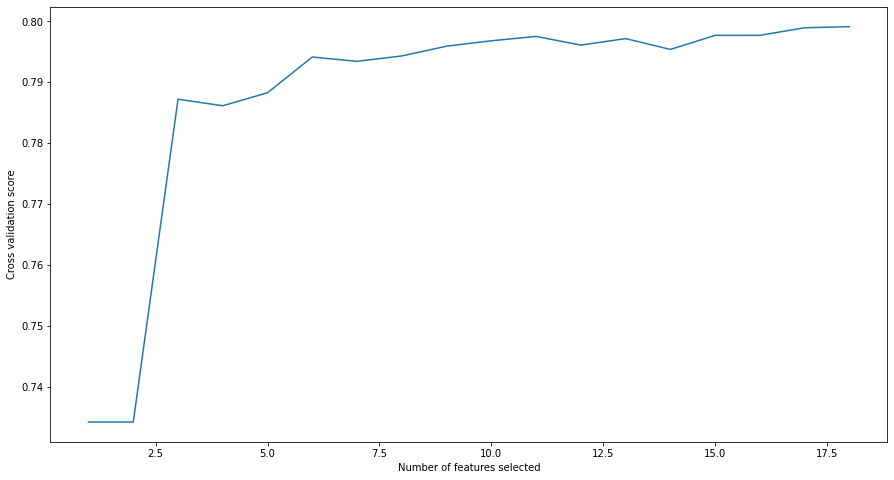

In [31]:
lr = LogisticRegression(penalty="l2",C=.1,random_state=0)
fs = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
fs.fit(X_train_sc, y_train)
print("Optimal number of features : %d" % fs.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(fs.grid_scores_) + 1), fs.grid_scores_)
plt.show()